In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
import pandas as pd
import numpy as np
from datetime import datetime
import time

In [2]:
#################################################################
def Vh2V3k(el,b, Vh):
  
    alpha = np.pi / 180.
    cosb = np.cos(b*alpha)
    sinb = np.sin(b*alpha)
    cosl = np.cos(el*alpha)
    sinl = np.sin(el*alpha)
    
    v3k = Vh-25.2*cosl*cosb-245.7*sinl*cosb+276.8*sinb

    return v3k

#################################################################

def Vcmb2Vmod(Vcmb, omegam=0.27):
    
    omegal=1.-omegam
    c=299800.
    z=Vcmb/c
    q0=0.5*(omegam-2.*omegal)
    fmod=1.+0.5*(1.-q0)*z-(1./6)*(1.-q0-3.*q0**2+1.)*z**2
    Vmod=c*z*fmod

    return Vmod
#################################################################

def Vh2Vls(el,b, Vh):
  
    alpha = np.pi / 180.
    cosb = np.cos(b*alpha)
    sinb = np.sin(b*alpha)
    cosl = np.cos(el*alpha)
    sinl = np.sin(el*alpha)
    
    vls = Vh-26.*cosl*cosb+317.*sinl*cosb-8.*sinb

    return vls
#################################################################

In [3]:
df = pd.read_csv('VirgoFornax_sbf.csv', delimiter='|')
df = df.rename(columns=lambda x: x.strip())
df = df.set_index('PGC')

ln10 = np.log(10.)
df['DM_VirFor']  = df["DM"]
df['eDM_VirFor'] = df["e_dm"]
df_VirFor = df.rename(columns={"PGC1": "PGC1_VirFor"})


df_VirFor.head()

,PGC1_VirFor,J2000,Name,g-z,e_gz,m_sbf,e_msbf,DM,e_dm,dist,e_d,Altname,DM_VirFor,eDM_VirFor
PGC,,,,,,,,,,,,,,
12636,12651,J032222.7-372351,FCC19,1.066,0.025,29.258,0.036,31.532,0.074,20.2,0.7,ESO301-08,31.532,0.074
12651,12651,J032241.7-371230,FCC21,1.368,0.007,29.676,0.020,31.607,0.065,21.0,0.6,NGC1316,31.607,0.065
12691,12651,J032337.3-354642,FCC26,0.830,0.025,28.974,0.055,31.491,0.139,19.9,1.3,ESO357-25,31.491,0.139
12825,12923,J032602.2-325340,FCC43,1.154,0.007,29.283,0.039,31.483,0.073,19.8,0.7,ESO358-01,31.483,0.073
12848,13418,J032632.2-354249,FCC47,1.298,0.013,29.271,0.040,31.314,0.075,18.3,0.6,NGC1336,31.314,0.075


In [4]:
df = pd.read_csv('Hydra_Centaurus_sbf.csv', delimiter='|')
df = df.rename(columns=lambda x: x.strip())
df = df.set_index('PGC')

ln10 = np.log(10.)
df['DM_HydCen']  = df["DM"]
df['eDM_HydCen'] = df["e_dm"]
df_HydCen = df.rename(columns={"PGC1": "PGC1_HydCen"})


df_HydCen.head()

,Name,PGC1_HydCen,Nest,GpID,RAJ,DeJ,Vo,V-I,Vh,Type,...,dBG,dGC,mbar,e_mbar,DM,e_dm,dist,e_d,DM_HydCen,eDM_HydCen
PGC,,,,,,,,,,,,,,,,,,,,,
31438,N3308,31478,100006,487,10 36 22.3,-27 26 17,12.10,1.28,3537,SB0(2)[SAB(s)0-],...,0.028,0.24,31.88,0.28,33.04,0.30,40.6,5.7,33.04,0.30
31466,N3311,31478,100006,487,10 36 35.7,-27 31 05,11.90,1.21,4068,E1[E3],...,0.030,0.25,31.33,0.10,33.09,0.14,41.4,2.6,33.09,0.14
31478,N3309,31478,100006,487,10 36 42.7,-27 31 42,10.90,1.15,3713,S0(2)[E+2],...,0.042,0.14,31.30,0.09,32.81,0.13,36.5,2.1,32.81,0.13
43058,52,43296,100003,441,12 45 44.3,-41 02 58,17.86,1.09,2609,"dE,N",...,0.072,0.22,31.47,0.43,33.47,0.45,49.4,10.0,33.47,0.45
43280,61,43296,100003,441,12 48 39.7,-41 16 05,16.26,1.14,2910,"dE,N",...,0.068,0.26,31.46,0.29,33.23,0.32,44.2,6.5,33.23,0.32


In [5]:
df = pd.read_csv('Tonry_sbf.csv', delimiter='|')
df = df.rename(columns=lambda x: x.strip())
df = df.set_index('PGC')

ln10 = np.log(10.)
df['DM_Tonry']  = df["Modc"]
df['eDM_Tonry'] = df["e_Mod"]
df_Tonry = df.rename(columns={"PGC1": "PGC1_Tonry"})


df_Tonry.head()

,objname,Modc,PGC1_Tonry,Nest,al2000,de2000,V_hel,T,GrpID,AgB,...,PD,NbarI,Sigma,Qual,icnt,NBG_ID,LH_ID,fil,DM_Tonry,eDM_Tonry
PGC,,,,,,,,,,,,,,,,,,,,,
218,N7814,30.45,218,211714,0.813,16.146,1059,2,0,0.19,...,0.51,20.31,0.000,good,1211,65 -6 6,NaN,65.0,30.45,0.14
1160,N0063,31.30,1160,212242,4.440,11.449,1160,0,0,0.48,...,1.14,17.82,0.000,good,1213,65 6 6,NaN,65.0,31.30,0.33
2004,N0147,24.24,2557,0,8.298,48.508,-193,-5,282,0.75,...,0.01,13.58,0.000,good,222,14-12 12,NaN,14.0,24.24,0.16
2329,N0185,23.82,2557,0,9.742,48.338,-202,-5,282,0.79,...,0.01,14.17,0.000,good,222,14-12 12,NaN,14.0,23.82,0.16
2555,N0221,24.35,2557,0,10.675,40.865,-200,-6,282,0.35,...,0.01,15.56,1.869,good,222,14-12 12,NaN,14.0,24.35,0.08


In [6]:
df = pd.read_csv('HST_IR_sbf.csv', delimiter='|')
df = df.rename(columns=lambda x: x.strip())
df = df.set_index('PGC')

ln10 = np.log(10.)
df['DM_HSTIR']  = df["DM"]
df['eDM_HSTIR'] = df["edm"]
df_HSTIR = df.rename(columns={"PGC1": "PGC1_HSTIR"})


df_HSTIR.head()

,Name,PGC1_HSTIR,Nest,DM,edm,Vhel,Ty,RA_DEJ,glon,glat,sgl,sgb,Ag,DM_HSTIR,eDM_HSTIR
PGC,,,,,,,,,,,,,,,
1037,NGC0057,1037,200319,34.126,0.074,5449,-4.9,J001530.9+171942,110.8305,-44.6976,310.9031,13.7833,0.335,34.126,0.074
3455,NGC0315,3455,200070,34.167,0.068,4974,-4.1,J005748.9+302108,124.5630,-32.4992,326.0060,7.2773,0.280,34.167,0.068
3982,NGC0383,4224,200005,34.100,0.076,5057,-2.9,J010724.9+322446,126.8388,-30.3378,328.5287,5.8072,0.307,34.100,0.076
4224,NGC0410,4224,200005,33.937,0.070,5276,-4.3,J011058.9+330908,127.6335,-29.5410,329.4427,5.2765,0.254,33.937,0.070
5037,NGC0495,5098,200006,34.049,0.059,4104,0.2,J012256.2+332813,130.4359,-28.9420,330.4440,2.9656,0.311,34.049,0.059


In [7]:
df = pd.read_csv('Cantiello18_sbf.csv', delimiter='|')
df = df.rename(columns=lambda x: x.strip())
df = df.set_index('PGC')

ln10 = np.log(10.)
df['DM_Cantiello18']  = df["DM"]
df['eDM_Cantiello18'] = df["edm"]
df_Cantiello18 = df.rename(columns={"PGC1": "PGC1_Cantiello18"})


df_Cantiello18.head()

,Name,VCC,dist,eD,DM,edm,Vhel,PGC1_Cantiello18,Nest,Gp,...,uz,euz,gi,egi,gz,egz,Mbar,eMbar,DM_Cantiello18,eDM_Cantiello18
PGC,,,,,,,,,,,,,,,,,,,,,
38890,NGC4168,VCC0049,31.4,1.9,32.49,0.13,2273,38890,130002,M,...,2.623,0.007,0.983,0.002,1.214,0.007,31.63,0.09,32.49,0.13
39246,NGC4216,VCC0167,18.1,1.9,31.29,0.23,134,41220,100002,V,...,2.501,0.030,0.999,0.013,1.234,0.029,30.30,0.14,31.29,0.23
39328,NGC4224,VCC0199,21.5,1.3,31.66,0.13,2587,39659,120002,W/W'?,...,2.568,0.012,0.989,0.005,1.211,0.010,30.76,0.07,31.66,0.13
39384,NGC4233,VCC0220,31.1,2.2,32.46,0.15,2275,39659,120002,W,...,2.737,0.008,1.033,0.004,1.302,0.007,31.75,0.12,32.46,0.15
39389,NGC4235,VCC0222,26.6,2.4,32.12,0.19,2423,39659,120002,W,...,2.546,0.015,0.965,0.006,1.209,0.012,31.21,0.15,32.12,0.19


In [8]:
how = 'outer'
df = df_HSTIR.join(df_Tonry, lsuffix='_l0', rsuffix='_', how=how)
df = df.join(df_Cantiello18, lsuffix='_l1', rsuffix='_', how=how)
df = df.join(df_VirFor, lsuffix='_l2', rsuffix='_', how=how)
df = df.join(df_HydCen, lsuffix='_l3', rsuffix='_', how=how)
     

catalogs = ["VirFor", "Tonry","Cantiello18"] #,"HydCen"]"HSTIR"

ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat, "DM_"+cat, "eDM_"+cat]

df = df[ss]

ss = []
for cat in catalogs:
    ss += ['PGC1_'+cat]   
df['pgc1'] = df[ss].median(axis=1)
df = df[~df['pgc1'].isna()]


print(len(df))

df.head()

425


/home/ehsan/anaconda3/envs/py2/lib/python2.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


,PGC1_VirFor,DM_VirFor,eDM_VirFor,PGC1_Tonry,DM_Tonry,eDM_Tonry,PGC1_Cantiello18,DM_Cantiello18,eDM_Cantiello18,pgc1
PGC,,,,,,,,,,
218,NaN,NaN,NaN,218.0,30.45,0.14,NaN,NaN,NaN,218.0
1160,NaN,NaN,NaN,1160.0,31.30,0.33,NaN,NaN,NaN,1160.0
2004,NaN,NaN,NaN,2557.0,24.24,0.16,NaN,NaN,NaN,2557.0
2329,NaN,NaN,NaN,2557.0,23.82,0.16,NaN,NaN,NaN,2557.0
2555,NaN,NaN,NaN,2557.0,24.35,0.08,NaN,NaN,NaN,2557.0


In [9]:
catalogs

['VirFor', 'Tonry', 'Cantiello18']

In [10]:
d = np.zeros(len(catalogs))
myDict = {}
for i, cat in enumerate(catalogs):
    myDict[cat] = d[i]

for cat in catalogs:
    df['w_'+cat] = 1./df['eDM_'+cat]**2
    df['xw_'+cat] = (df['DM_'+cat]+myDict[cat])*df['w_'+cat]

  
dg = df.groupby("pgc1").agg(["sum", "count"])

for cat in catalogs:
    dg['eDMg_'+cat] = np.sqrt(1./dg['w_'+cat]['sum'])
    dg['DMg_'+cat] = (dg['xw_'+cat]['sum'])/dg['w_'+cat]['sum']

ss = []
for cat in catalogs:
    dg['N_'+cat] = dg["DM_"+cat]['count']
    ss += ['N_'+cat, "DMg_"+cat, "eDMg_"+cat]

dg = dg[ss]
dg.replace([np.inf, -np.inf], np.nan, inplace=True)

dg.index = dg.index.astype('int')


ss = ['DMg_'+cat for cat in catalogs]+['eDMg_'+cat for cat in catalogs]
dg_ = dg[ss]

for cat in catalogs:
        dg_['gw_'+cat] = 1./dg_['eDMg_'+cat]**2

/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
dg_.head()

,DMg_VirFor,DMg_Tonry,DMg_Cantiello18,eDMg_VirFor,eDMg_Tonry,eDMg_Cantiello18,gw_VirFor,gw_Tonry,gw_Cantiello18
,,,,,,,,,
pgc1,,,,,,,,,
218,NaN,30.450,NaN,NaN,0.140000,NaN,NaN,51.020408,NaN
1160,NaN,31.300,NaN,NaN,0.330000,NaN,NaN,9.182736,NaN
2557,NaN,24.226,NaN,NaN,0.050596,NaN,NaN,390.625000,NaN
2980,NaN,31.460,NaN,NaN,0.470000,NaN,NaN,4.526935,NaN
4126,NaN,27.370,NaN,NaN,0.100000,NaN,NaN,100.000000,NaN


In [12]:
def GfastChi2(dg, theta=None):
    
    if theta is None:
        d = np.zeros(len(catalogs))
    else:
        theta = np.asarray(theta)
        d = np.concatenate((np.zeros(1), theta[1:]))
    
    myDict = {}
    for i, cat in enumerate(catalogs):
        myDict[cat] = d[i]

    ###########################################################
        
    for cat in catalogs:
#         dg['gw_'+cat] = 1./dg['eDMg_'+cat]**2
        dg['gxw_'+cat] = (dg['DMg_'+cat]+myDict[cat])*dg['gw_'+cat]


    sx = ['gxw_'+cat for cat in catalogs]
    sw = ['gw_'+cat for cat in catalogs]
    
    ERRave2 = 1./dg[sw].sum(axis=1)
    ave = dg[sx].sum(axis=1)*ERRave2
    
    myDict[catalogs[0]] = theta[0]
    for cat in catalogs:
        dg['gxi2_'+cat] = ((dg['DMg_'+cat]+myDict[cat]-ave)**2)/(dg_['eDMg_'+cat]**2+ERRave2)


    sxi = ['gxi2_'+cat for cat in catalogs]    
    XI2 = dg[sxi].sum(axis=1)

    return XI2.sum()

In [13]:
catalogs

['VirFor', 'Tonry', 'Cantiello18']

In [14]:
t1 =  datetime.now()

print GfastChi2(dg_, theta=range(len(catalogs)))

###########################################
t2 =  datetime.now()
print("Execution time:")
print(t2-t1)

13236.697782685376
Execution time:
0:00:00.029417


In [15]:
len(dg_)

178

In [16]:
len(df)

425

In [17]:
def lnlike(theta):
    
    xi2 = GfastChi2(dg_, theta=theta)
    
    return -0.5*xi2


def lnprior(theta):
    
    return 0.0


def lnprob(theta):
    
    lp = lnprior(theta)
    if not np.isfinite(lp) :
        return -np.inf    
    return lp + lnlike(theta)

Execution time:
5:55:17.291355


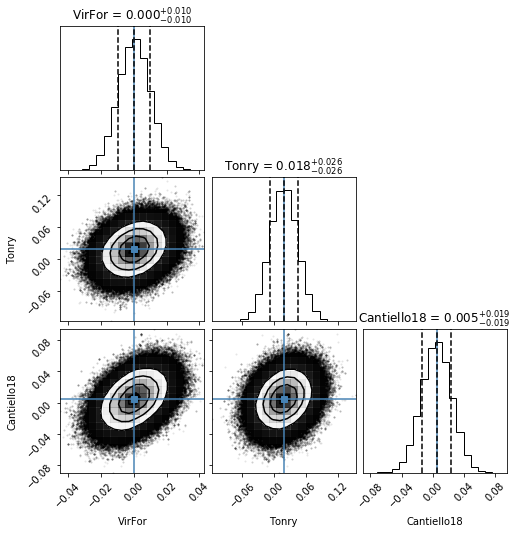

In [18]:
t1 =  datetime.now()
###########################################

ndim, nwalkers = len(catalogs), 128

p0 = [np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

sampler.reset()
sampler.run_mcmc(p0, 10000)
samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))

theta = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                            zip(*np.percentile(samples, 
                            [16, 50, 84],
                            axis=0)))

truths=[t[0] for t in theta]
fig = corner.corner(samples, labels=catalogs, 
                    truths=truths, 
                    quantiles=[0.16, 0.5, 0.84], 
                    show_titles=True, 
                    title_kwargs={"fontsize": 12}, 
                    title_fmt=".3f")

###########################################
t2 =  datetime.now()
print("Execution time:")
print(t2-t1)

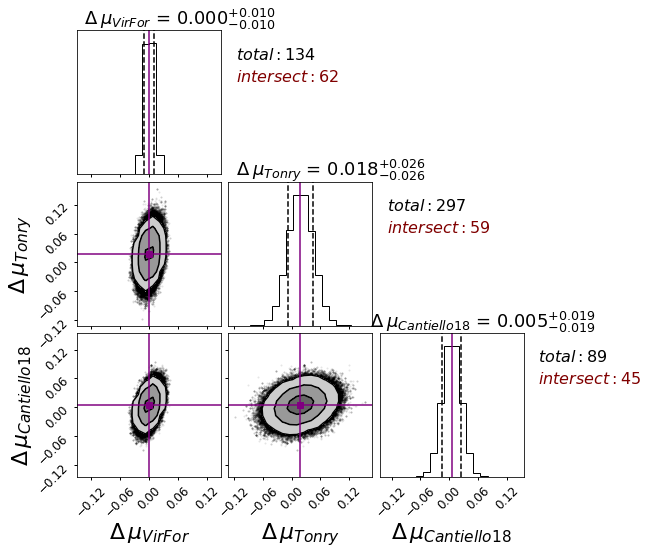

In [19]:
theta = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                            zip(*np.percentile(samples, 
                            [16, 50, 84],
                            axis=0)))

truths=[t[0] for t in theta]

labels = ['           '+r'$\Delta\/ \mu_{'+cat+'}$' for cat in ["VirFor", "Tonry", "Cantiello18"]] #catalogs[1:]]

fig = corner.corner(samples, labels=labels, 
                    truths=truths, truth_color='purple',
                    levels=(1-np.exp(-1./8),1-np.exp(-0.5),1-np.exp(-0.5*4),1-np.exp(-0.5*9)),
                    show_titles=True, fill_contours=True, plot_density=True,
                    quantiles=[0.16, 0.84], 
                    scale_hist=False,space=0, 
                    title_kwargs={"fontsize": 18}, 
                    title_fmt=".3f",
                    range=[(t-0.15, t+0.15) for t in truths]
                   )

m = 0 
n_cat = len(catalogs)
i_cat = 0
for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=12)
    
    lbl = ax.xaxis.get_label()
    lbl.set_fontsize(22)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)
    lbl.set_linespacing(50)
    lbl = ax.yaxis.get_label()
    lbl.set_fontsize(22)
    txt = lbl.get_text().strip()
    lbl.set_text(txt)    
    
    
    ax.tick_params(which='major', length=3, width=1., direction='out')
    
    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = -0.1*Xlm[0]+1.1*Xlm[1]
    
    if m%(n_cat+1)==0:
        y0 = 0.2*Ylm[0]+0.80*Ylm[1]
        dx = df[['DM_'+catalogs[i_cat]]].dropna()
        ax.text(x0,y0, r"$total: $"+str(len(dx)), fontsize=16, color='k')
        
        y0 = 0.35*Ylm[0]+0.65*Ylm[1]
        other_DMs = ["DM_"+c for c in catalogs if c != catalogs[i_cat]]
        
        df["sumDM"] = df[other_DMs].sum(axis=1)
        df["sumDM"][df["sumDM"]==0] = np.nan
        
        dx = df[['sumDM', 'DM_'+catalogs[i_cat]]].dropna()       
        ax.text(x0,y0, r"$intersect: $"+str(len(dx)), fontsize=16, color='maroon')
        i_cat += 1


    m+=1

